In [ ]:
import pandas as pd
import numpy as np
import sklearn.preprocessing
import pandas_datareader.data as pdr
import datetime as dt
import requests

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving S&P_500_5_years_day2.csv to S&P_500_5_years_day2.csv


DATA PREPROCESSING

In [ ]:
data = pd.read_csv("S&P_500_5_years_day2.csv")
data.head()

,Date,Open,High,Low,Close
0,1/2/2015,"2,058.90","2,072.36","2,046.04","2,058.20"
1,1/5/2015,"2,054.44","2,054.44","2,017.34","2,020.58"
2,1/6/2015,"2,022.15","2,030.25","1,992.44","2,002.61"
3,1/7/2015,"2,005.55","2,029.61","2,005.55","2,025.90"
4,1/8/2015,"2,030.61","2,064.08","2,030.61","2,062.14"


In [ ]:
import math
import tensorflow as tf
import sklearn
import os
import sklearn.preprocessing

from sklearn.preprocessing import MinMaxScaler


In [ ]:
data.dtypes

Date     object
Open     object
High     object
Low      object
Close    object
dtype: object

In [ ]:
import datetime
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
data['Open'] = data['Open'].apply(lambda x: x.replace(',','') )
data['High'] = data['High'].apply(lambda x: x.replace(',','') )
data['Low'] = data['Low'].apply(lambda x: x.replace(',','') )
data['Close'] = data['Close'].apply(lambda x: x.replace(',',''))

In [ ]:
data.head()

,Date,Open,High,Low,Close
0,2015-01-02,2058.90,2072.36,2046.04,2058.20
1,2015-01-05,2054.44,2054.44,2017.34,2020.58
2,2015-01-06,2022.15,2030.25,1992.44,2002.61
3,2015-01-07,2005.55,2029.61,2005.55,2025.90
4,2015-01-08,2030.61,2064.08,2030.61,2062.14


In [ ]:
data = data.astype({'Open':float,'High':float,'Low':float,'Close':float})

In [ ]:
data.dtypes

Date     datetime64[ns]
Open            float64
High            float64
Low             float64
Close           float64
dtype: object

In [ ]:
data.head()

,Date,Open,High,Low,Close
0,2015-01-02,2058.90,2072.36,2046.04,2058.20
1,2015-01-05,2054.44,2054.44,2017.34,2020.58
2,2015-01-06,2022.15,2030.25,1992.44,2002.61
3,2015-01-07,2005.55,2029.61,2005.55,2025.90
4,2015-01-08,2030.61,2064.08,2030.61,2062.14


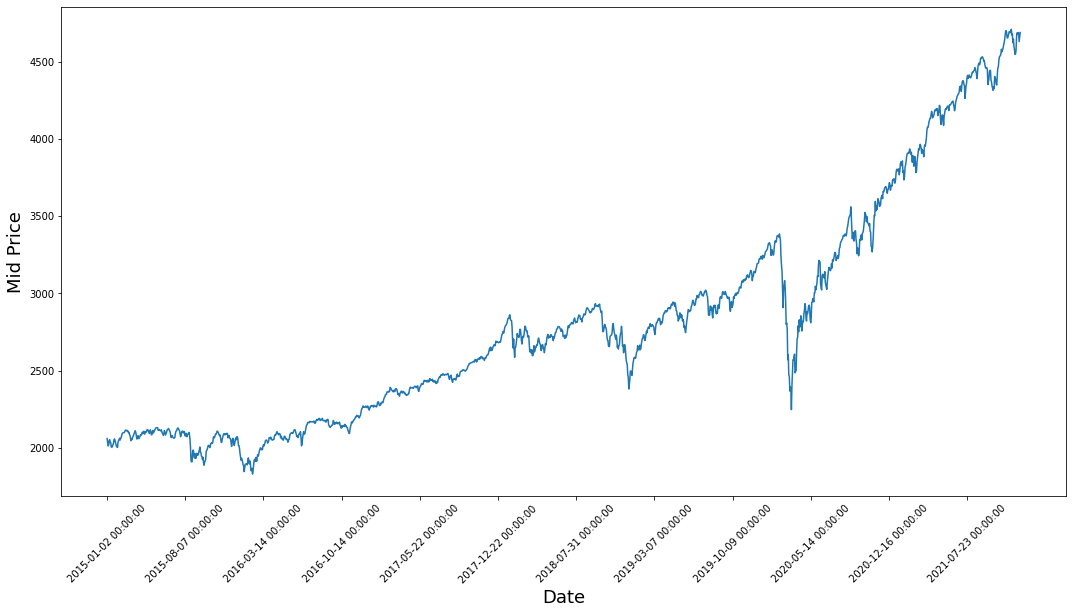

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (18,9))
plt.plot(range(data.shape[0]),(data['Low']+data['High'])/2.0)
plt.xticks(range(0,data.shape[0],150),data['Date'].loc[::150],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [ ]:
data["returns"] = data['Close'].pct_change()

In [ ]:
data.tail()

,Date,Open,High,Low,Close,returns
1748,2021-12-10,4687.64,4713.57,4670.24,4712.02,0.009549
1749,2021-12-13,4710.30,4710.30,4667.60,4668.97,-0.009136
1750,2021-12-14,4642.99,4660.47,4606.52,4634.09,-0.007471
1751,2021-12-15,4636.46,4712.60,4611.22,4709.85,0.016348
1752,2021-12-16,4719.13,4731.99,4651.89,4669.67,-0.008531


In [ ]:
len(data['returns'])

1753

In [ ]:
data.isnull().sum()

Date       0
Open       0
High       0
Low        0
Close      0
returns    1
dtype: int64

In [ ]:
data.shape

(1753, 6)

In [ ]:
data.isnull().sum()
data['returns'].fillna(int(data['returns'].mean()), inplace=True)
data.head()

,Date,Open,High,Low,Close,returns
0,2015-01-02,2058.90,2072.36,2046.04,2058.20,0.000000
1,2015-01-05,2054.44,2054.44,2017.34,2020.58,-0.018278
2,2015-01-06,2022.15,2030.25,1992.44,2002.61,-0.008893
3,2015-01-07,2005.55,2029.61,2005.55,2025.90,0.011630
4,2015-01-08,2030.61,2064.08,2030.61,2062.14,0.017888


In [ ]:
import datetime as dt
stop= "31/12/2020"
train = data[(pd.to_datetime(data["Date"]) <= stop)]
test = data[(pd.to_datetime(data["Date"]) > stop)]
test.head()

,Date,Open,High,Low,Close,returns
1511,2021-01-04,3764.61,3769.99,3662.71,3700.65,-0.014755
1512,2021-01-05,3698.02,3737.83,3695.07,3726.86,0.007083
1513,2021-01-06,3712.20,3783.04,3705.34,3748.14,0.005710
1514,2021-01-07,3764.71,3811.55,3764.71,3803.79,0.014847
1515,2021-01-08,3815.05,3826.69,3783.60,3824.68,0.005492


In [ ]:
test.shape,train.shape

((242, 6), (1511, 6))

In [ ]:
training_data = train.drop(['Date'],axis = 1)
training_data.head()

,Open,High,Low,Close,returns
0,2058.90,2072.36,2046.04,2058.20,0.000000
1,2054.44,2054.44,2017.34,2020.58,-0.018278
2,2022.15,2030.25,1992.44,2002.61,-0.008893
3,2005.55,2029.61,2005.55,2025.90,0.011630
4,2030.61,2064.08,2030.61,2062.14,0.017888


In [ ]:
training_data.tail

<bound method NDFrame.tail of          Open     High      Low    Close   returns
0     2058.90  2072.36  2046.04  2058.20  0.000000
1     2054.44  2054.44  2017.34  2020.58 -0.018278
2     2022.15  2030.25  1992.44  2002.61 -0.008893
3     2005.55  2029.61  2005.55  2025.90  0.011630
4     2030.61  2064.08  2030.61  2062.14  0.017888
...       ...      ...      ...      ...       ...
1506  3694.03  3703.82  3689.32  3703.06  0.003537
1507  3723.03  3740.51  3723.03  3735.36  0.008723
1508  3750.01  3756.12  3723.31  3727.04 -0.002227
1509  3736.19  3744.63  3730.21  3732.04  0.001342
1510  3733.27  3760.20  3726.88  3756.07  0.006439

[1511 rows x 5 columns]>

In [ ]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[0.11765565, 0.11779218, 0.12287838, 0.11890046, 0.56087207],
       [0.11532863, 0.10842567, 0.10793132, 0.09937779, 0.4753277 ],
       [0.09848117, 0.09578194, 0.09496331, 0.09005236, 0.51924918],
       ...,
       [1.        , 0.99786745, 0.99640646, 0.98493505, 0.55044767],
       [0.99278935, 0.9918618 , 1.        , 0.98752977, 0.56715072],
       [0.99126583, 1.        , 0.99826572, 1.        , 0.59100682]])

In [ ]:
X_train = []
Y_train = []

In [ ]:
for i in range(166, training_data.shape[0]):
  X_train.append(training_data[i-166:i])
  Y_train.append(training_data[i,4])

In [ ]:
X_train,Y_train = np.array(X_train), np.array(Y_train)

In [ ]:
X_train.shape,Y_train.shape

((1345, 166, 5), (1345,))

SimpleRNN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN, Dropout

In [ ]:
Sregressor = Sequential()
Sregressor.add(SimpleRNN(units = 60, activation='tanh',return_sequences=True,input_shape = (X_train.shape[1],5)))
Sregressor.add(Dropout(0.2))

Sregressor.add(SimpleRNN(units = 60, activation='tanh',return_sequences=True))
Sregressor.add(Dropout(0.3))

Sregressor.add(SimpleRNN(units = 80, activation='tanh',return_sequences=True))
Sregressor.add(Dropout(0.4))


Sregressor.add(SimpleRNN(units = 120, activation='tanh'))
Sregressor.add(Dropout(0.5))

Sregressor.add(Dense(units = 1))

In [ ]:
Sregressor.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='mean_squared_error',metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
Sregressor.fit(X_train,Y_train,epochs=10,batch_size=30)

Epoch 1/10
45/45 [==============================] - 13s 220ms/step - loss: 1.0953 - root_mean_squared_error: 1.0466
Epoch 2/10
45/45 [==============================] - 15s 341ms/step - loss: 1.0242 - root_mean_squared_error: 1.0120
Epoch 3/10
45/45 [==============================] - 14s 307ms/step - loss: 0.9464 - root_mean_squared_error: 0.9728
Epoch 4/10
45/45 [==============================] - 12s 278ms/step - loss: 0.9294 - root_mean_squared_error: 0.9641
Epoch 5/10
45/45 [==============================] - 10s 227ms/step - loss: 0.8616 - root_mean_squared_error: 0.9282
Epoch 6/10
45/45 [==============================] - 11s 238ms/step - loss: 0.7539 - root_mean_squared_error: 0.8683
Epoch 7/10
45/45 [==============================] - 9s 203ms/step - loss: 0.7355 - root_mean_squared_error: 0.8576
Epoch 8/10
45/45 [==============================] - 8s 183ms/step - loss: 0.6951 - root_mean_squared_error: 0.8338
Epoch 9/10
45/45 [==============================] - 8s 183ms/step - loss: 

In [ ]:
past_60_days = train.tail(166)
past_60_days.head()

,Date,Open,High,Low,Close,returns
1345,2020-05-07,2878.26,2901.92,2876.48,2881.19,0.011505
1346,2020-05-08,2908.83,2932.16,2902.88,2929.80,0.016872
1347,2020-05-11,2915.46,2944.25,2903.44,2930.32,0.000177
1348,2020-05-12,2939.50,2945.82,2869.59,2870.12,-0.020544
1349,2020-05-13,2865.86,2874.14,2793.15,2820.00,-0.017463


In [ ]:
df = past_60_days.append(test,ignore_index=True)
df.head()
df.drop(['Date'],axis = 1, inplace=True)

In [ ]:
inputs = scaler.transform(df)
inputs.shape

(408, 5)

In [ ]:
X_test = []
Y_test = []
for i in range(166,inputs.shape[0]):
  X_test.append(inputs[i-166:i])
  Y_test.append(inputs[i,4])

In [ ]:
X_test,Y_test = np.array(X_test), np.array(Y_test)
X_test.shape,Y_test.shape

((242, 166, 5), (242,))

In [ ]:
y_pred = Sregressor.predict(X_test)

In [ ]:
scaler.scale_

array([5.21754556e-04, 5.22684508e-04, 5.20803496e-04, 5.18944053e-04,
       4.68015450e+00])

In [ ]:
scale = 1/4.68015450e+00
scale

0.213668159886602

In [ ]:
y_pred = y_pred*scale
Y_test = Y_test*scale

In [ ]:
rmse = np.sqrt(np.mean(((y_pred-Y_test)**2)))
rmse

0.0452275967371444

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


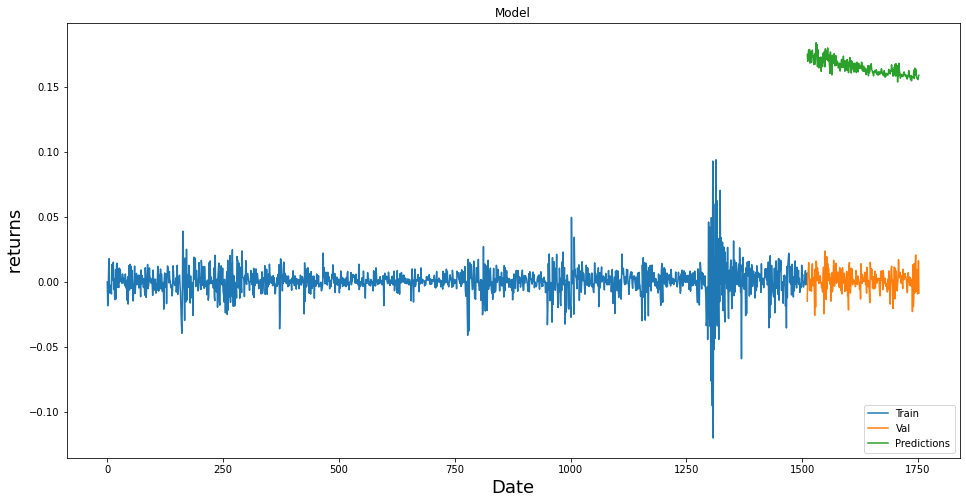

In [ ]:
# Visualising the results
import matplotlib.pyplot as plt
training_data_len = len(train)
trains = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = y_pred
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel(' returns ', fontsize=18)
plt.plot(trains['returns'])
plt.plot(valid[['returns', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dropout

In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 60, activation='tanh',return_sequences=True,input_shape = (X_train.shape[1],5)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, activation='tanh',return_sequences=True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 80, activation='tanh',return_sequences=True))
regressor.add(Dropout(0.4))


regressor.add(LSTM(units = 120, activation='tanh'))
regressor.add(Dropout(0.5))

regressor.add(Dense(units = 1))

In [ ]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 166, 60)           15840     
                                                                 
 dropout (Dropout)           (None, 166, 60)           0         
                                                                 
 lstm_1 (LSTM)               (None, 166, 60)           29040     
                                                                 
 dropout_1 (Dropout)         (None, 166, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 166, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 166, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
regressor.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.000001),loss='mean_squared_error',metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
regressor.fit(X_train,Y_train,epochs=10,batch_size=30)

Epoch 1/10
45/45 [==============================] - 28s 454ms/step - loss: 0.2863 - root_mean_squared_error: 0.5351
Epoch 2/10
45/45 [==============================] - 20s 452ms/step - loss: 0.2807 - root_mean_squared_error: 0.5298
Epoch 3/10
45/45 [==============================] - 20s 452ms/step - loss: 0.2719 - root_mean_squared_error: 0.5215
Epoch 4/10
45/45 [==============================] - 20s 453ms/step - loss: 0.2659 - root_mean_squared_error: 0.5157
Epoch 5/10
45/45 [==============================] - 20s 450ms/step - loss: 0.2606 - root_mean_squared_error: 0.5105
Epoch 6/10
45/45 [==============================] - 20s 448ms/step - loss: 0.2564 - root_mean_squared_error: 0.5064
Epoch 7/10
45/45 [==============================] - 20s 451ms/step - loss: 0.2484 - root_mean_squared_error: 0.4984
Epoch 8/10
45/45 [==============================] - 20s 451ms/step - loss: 0.2418 - root_mean_squared_error: 0.4917
Epoch 9/10
45/45 [==============================] - 20s 452ms/step - los

In [ ]:
(X_train.shape[1],5)

(166, 5)

In [ ]:
past_60_days = train.tail(166)
past_60_days.head()

,Date,Open,High,Low,Close,returns
1345,2020-05-07,2878.26,2901.92,2876.48,2881.19,0.011505
1346,2020-05-08,2908.83,2932.16,2902.88,2929.80,0.016872
1347,2020-05-11,2915.46,2944.25,2903.44,2930.32,0.000177
1348,2020-05-12,2939.50,2945.82,2869.59,2870.12,-0.020544
1349,2020-05-13,2865.86,2874.14,2793.15,2820.00,-0.017463


In [ ]:
df = past_60_days.append(test,ignore_index=True)
df.head()
df.drop(['Date'],axis = 1, inplace=True)

In [ ]:
df.head()

,Open,High,Low,Close,returns
0,2878.26,2901.92,2876.48,2881.19,0.011505
1,2908.83,2932.16,2902.88,2929.80,0.016872
2,2915.46,2944.25,2903.44,2930.32,0.000177
3,2939.50,2945.82,2869.59,2870.12,-0.020544
4,2865.86,2874.14,2793.15,2820.00,-0.017463


In [ ]:
df.shape

(408, 5)

In [ ]:
inputs = scaler.transform(df)
inputs.shape

(408, 5)

In [ ]:
inputs

array([[0.54516047, 0.55139034, 0.55537443, 0.54598623, 0.61471548],
       [0.5611105 , 0.56719632, 0.56912364, 0.5712121 , 0.6398333 ],
       [0.56456974, 0.57351558, 0.56941529, 0.57148195, 0.56170273],
       ...,
       [1.46591638, 1.47055718, 1.45638531, 1.45564326, 0.52590851],
       [1.46250933, 1.49780473, 1.45883309, 1.49495846, 0.63738515],
       [1.50564278, 1.50793958, 1.48001417, 1.47410729, 0.5209454 ]])

In [ ]:
inputs[166,4]

0.4918174016965879

In [ ]:
X_test = []
Y_test = []
for i in range(166,inputs.shape[0]):
  X_test.append(inputs[i-166:i])
  Y_test.append(inputs[i,4])

In [ ]:
X_test,Y_test = np.array(X_test), np.array(Y_test)
X_test.shape,Y_test.shape

((242, 166, 5), (242,))

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
y_pred

array([[0.16943884],
       [0.1697217 ],
       [0.16999395],
       [0.1702561 ],
       [0.17051564],
       [0.17077957],
       [0.17104799],
       [0.17132118],
       [0.1716003 ],
       [0.1718849 ],
       [0.17217031],
       [0.17245609],
       [0.17274617],
       [0.17304286],
       [0.1733438 ],
       [0.1736477 ],
       [0.17395417],
       [0.17425212],
       [0.17453676],
       [0.17480025],
       [0.17504059],
       [0.17526348],
       [0.17547294],
       [0.17567344],
       [0.17587069],
       [0.17607032],
       [0.17627591],
       [0.17648937],
       [0.17671269],
       [0.17694727],
       [0.17719391],
       [0.17745054],
       [0.17771308],
       [0.17797881],
       [0.17824203],
       [0.17849617],
       [0.17874086],
       [0.17896938],
       [0.17917587],
       [0.1793657 ],
       [0.17954141],
       [0.17969736],
       [0.17982504],
       [0.17992547],
       [0.18000099],
       [0.1800578 ],
       [0.1801042 ],
       [0.180

In [ ]:
scaler.scale_

array([5.21754556e-04, 5.22684508e-04, 5.20803496e-04, 5.18944053e-04,
       4.68015450e+00])

In [ ]:
scale = 1/4.68015450e+00
scale

0.213668159886602

In [ ]:
y_pred = y_pred*scale
Y_test = Y_test*scale

In [ ]:
Y_test

array([0.10508572, 0.12692304, 0.1255504 , 0.13468787, 0.12533239,
       0.11328571, 0.12025633, 0.12211611, 0.11608706, 0.11265049,
       0.12797691, 0.13377608, 0.12015723, 0.11682992, 0.12345631,
       0.11835167, 0.09416264, 0.12960117, 0.100529  , 0.13589224,
       0.13373874, 0.12084931, 0.13069381, 0.12373798, 0.12723985,
       0.11872701, 0.11949534, 0.12150296, 0.12455149, 0.11927123,
       0.1195201 , 0.11542469, 0.11798561, 0.11210765, 0.12109679,
       0.13119216, 0.09536166, 0.11509034, 0.14363122, 0.11175966,
       0.1067743 , 0.10642329, 0.13933648, 0.11448123, 0.13399519,
       0.12587079, 0.13023598, 0.1208559 , 0.12633246, 0.11827081,
       0.12271985, 0.10508   , 0.11923776, 0.12686562, 0.11220967,
       0.1143732 , 0.12508074, 0.1364717 , 0.11897248, 0.11668268,
       0.12346304, 0.13166565, 0.13427878, 0.11886696, 0.12131573,
       0.12406114, 0.12756047, 0.11964432, 0.12313508, 0.1157527 ,
       0.13093475, 0.12344925, 0.11453405, 0.11303814, 0.12914

In [ ]:
y_pred

array([[0.03620368],
       [0.03626412],
       [0.03632229],
       [0.03637831],
       [0.03643376],
       [0.03649016],
       [0.03654751],
       [0.03660588],
       [0.03666552],
       [0.03672633],
       [0.03678731],
       [0.03684837],
       [0.03691036],
       [0.03697375],
       [0.03703805],
       [0.03710298],
       [0.03716847],
       [0.03723213],
       [0.03729295],
       [0.03734925],
       [0.0374006 ],
       [0.03744822],
       [0.03749298],
       [0.03753582],
       [0.03757796],
       [0.03762062],
       [0.03766455],
       [0.03771016],
       [0.03775787],
       [0.03780799],
       [0.0378607 ],
       [0.03791553],
       [0.03797163],
       [0.0380284 ],
       [0.03808464],
       [0.03813894],
       [0.03819123],
       [0.03824006],
       [0.03828418],
       [0.03832474],
       [0.03836228],
       [0.0383956 ],
       [0.03842288],
       [0.03844434],
       [0.03846048],
       [0.03847262],
       [0.03848253],
       [0.038

In [ ]:
rmse = np.sqrt(np.mean(((y_pred-Y_test)**2)))
rmse

0.08029115443833747

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


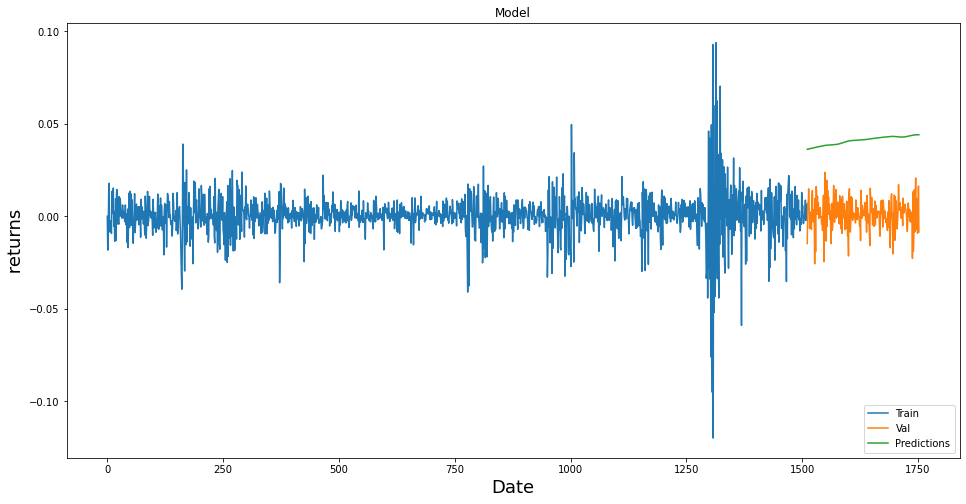

In [ ]:
# Visualising the results
import matplotlib.pyplot as plt
training_data_len = len(train)
trains = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = y_pred
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel(' returns ', fontsize=18)
plt.plot(trains['returns'])
plt.plot(valid[['returns', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

GRU

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import GRU, Dropout

In [ ]:
GRUregressor = Sequential()
GRUregressor.add(GRU(units = 3, activation='tanh',return_sequences=True,input_shape = (X_train.shape[1],5)))
GRUregressor.add(Dropout(0.2))

GRUregressor.add(GRU(units = 3, activation='relu',return_sequences=True))
GRUregressor.add(Dropout(0.3))

#GRUregressor.add(GRU(units = 4, activation='tanh',return_sequences=True))
#GRUregressor.add(Dropout(0.3))


GRUregressor.add(GRU(units = 4, activation='relu',return_sequences=True))
GRUregressor.add(Dropout(0.3))
GRUregressor.add(GRU(units = 3, activation='tanh',return_sequences=True))
GRUregressor.add(Dropout(0.5))
GRUregressor.add(GRU(units = 3, activation='relu',return_sequences=False))
GRUregressor.add(Dropout(0.5))

# GRUregressor.add(GRU(units = 60, activation='tanh',return_sequences=True))
# GRUregressor.add(Dropout(0.4))


# GRUregressor.add(LSTM(units = 60, activation='tanh'))
# GRUregressor.add(Dropout(0.5))
#GRUregressor.add(Dense(units = 3))
#GRUregressor.add(Dense(units = 3))
GRUregressor.add(Dense(units = 1))

In [ ]:
GRUregressor.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 166, 3)            90        
                                                                 
 dropout_4 (Dropout)         (None, 166, 3)            0         
                                                                 
 gru_1 (GRU)                 (None, 166, 3)            72        
                                                                 
 dropout_5 (Dropout)         (None, 166, 3)            0         
                                                                 
 gru_2 (GRU)                 (None, 166, 4)            108       
                                                                 
 dropout_6 (Dropout)         (None, 166, 4)            0         
                                                                 
 gru_3 (GRU)                 (None, 166, 3)           

In [ ]:
GRUregressor.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.000001),loss='mean_squared_error',metrics=[[tf.keras.metrics.RootMeanSquaredError()],'accuracy'])

In [ ]:
GRUregressor.fit(X_train,Y_train,epochs=100,batch_size=24)

Epoch 1/100
57/57 [==============================] - 25s 303ms/step - loss: 0.3086 - root_mean_squared_error: 0.5555 - accuracy: 7.4349e-04
Epoch 2/100
57/57 [==============================] - 17s 304ms/step - loss: 0.3079 - root_mean_squared_error: 0.5549 - accuracy: 7.4349e-04
Epoch 3/100
57/57 [==============================] - 17s 302ms/step - loss: 0.3081 - root_mean_squared_error: 0.5551 - accuracy: 7.4349e-04
Epoch 4/100
57/57 [==============================] - 17s 298ms/step - loss: 0.3075 - root_mean_squared_error: 0.5546 - accuracy: 7.4349e-04
Epoch 5/100
57/57 [==============================] - 17s 301ms/step - loss: 0.3073 - root_mean_squared_error: 0.5543 - accuracy: 7.4349e-04
Epoch 6/100
57/57 [==============================] - 17s 301ms/step - loss: 0.3080 - root_mean_squared_error: 0.5549 - accuracy: 7.4349e-04
Epoch 7/100
57/57 [==============================] - 17s 302ms/step - loss: 0.3082 - root_mean_squared_error: 0.5551 - accuracy: 7.4349e-04
Epoch 8/100
57/57 [=

In [ ]:
(X_train.shape[1],5)

(166, 5)

In [ ]:
past_60_days = train.tail(166)
past_60_days.head()

,Date,Open,High,Low,Close,returns
1345,2020-05-07,2878.26,2901.92,2876.48,2881.19,0.011505
1346,2020-05-08,2908.83,2932.16,2902.88,2929.80,0.016872
1347,2020-05-11,2915.46,2944.25,2903.44,2930.32,0.000177
1348,2020-05-12,2939.50,2945.82,2869.59,2870.12,-0.020544
1349,2020-05-13,2865.86,2874.14,2793.15,2820.00,-0.017463


In [ ]:
df = past_60_days.append(test,ignore_index=True)
df.head()
df.drop(['Date'],axis = 1, inplace=True)

In [ ]:
df.head()

,Open,High,Low,Close,returns
0,2878.26,2901.92,2876.48,2881.19,0.011505
1,2908.83,2932.16,2902.88,2929.80,0.016872
2,2915.46,2944.25,2903.44,2930.32,0.000177
3,2939.50,2945.82,2869.59,2870.12,-0.020544
4,2865.86,2874.14,2793.15,2820.00,-0.017463


In [ ]:
df.shape

(408, 5)

In [ ]:
input = scaler.transform(df)
input.shape

(408, 5)

In [ ]:
input

array([[0.54516047, 0.55139034, 0.55537443, 0.54598623, 0.61471548],
       [0.5611105 , 0.56719632, 0.56912364, 0.5712121 , 0.6398333 ],
       [0.56456974, 0.57351558, 0.56941529, 0.57148195, 0.56170273],
       ...,
       [1.46591638, 1.47055718, 1.45638531, 1.45564326, 0.52590851],
       [1.46250933, 1.49780473, 1.45883309, 1.49495846, 0.63738515],
       [1.50564278, 1.50793958, 1.48001417, 1.47410729, 0.5209454 ]])

In [ ]:
A_test = []
B_test = []
for i in range(166,input.shape[0]):
  A_test.append(input[i-166:i])
  B_test.append(input[i,4])

In [ ]:
A_test,B_test = np.array(A_test), np.array(B_test)
A_test.shape,B_test.shape

((242, 166, 5), (242,))

In [ ]:
B_pred = GRUregressor.predict(A_test)

In [ ]:
B_pred = np.array(B_pred)
B_pred.shape

(242, 1)

In [ ]:
scaler.scale_
scale = 1/4.68015450e+00
scale

0.213668159886602

In [ ]:
B_pred = B_pred*scale
B_test = B_test*scale

In [ ]:
B_test

array([0.10508572, 0.12692304, 0.1255504 , 0.13468787, 0.12533239,
       0.11328571, 0.12025633, 0.12211611, 0.11608706, 0.11265049,
       0.12797691, 0.13377608, 0.12015723, 0.11682992, 0.12345631,
       0.11835167, 0.09416264, 0.12960117, 0.100529  , 0.13589224,
       0.13373874, 0.12084931, 0.13069381, 0.12373798, 0.12723985,
       0.11872701, 0.11949534, 0.12150296, 0.12455149, 0.11927123,
       0.1195201 , 0.11542469, 0.11798561, 0.11210765, 0.12109679,
       0.13119216, 0.09536166, 0.11509034, 0.14363122, 0.11175966,
       0.1067743 , 0.10642329, 0.13933648, 0.11448123, 0.13399519,
       0.12587079, 0.13023598, 0.1208559 , 0.12633246, 0.11827081,
       0.12271985, 0.10508   , 0.11923776, 0.12686562, 0.11220967,
       0.1143732 , 0.12508074, 0.1364717 , 0.11897248, 0.11668268,
       0.12346304, 0.13166565, 0.13427878, 0.11886696, 0.12131573,
       0.12406114, 0.12756047, 0.11964432, 0.12313508, 0.1157527 ,
       0.13093475, 0.12344925, 0.11453405, 0.11303814, 0.12914

In [ ]:
B_pred

array([[0.00638503],
       [0.00638742],
       [0.00638979],
       [0.00639155],
       [0.00639364],
       [0.00639671],
       [0.00639993],
       [0.00640395],
       [0.00640856],
       [0.00641245],
       [0.00641503],
       [0.00641739],
       [0.00642033],
       [0.00642303],
       [0.0064255 ],
       [0.006429  ],
       [0.00643232],
       [0.00643242],
       [0.0064318 ],
       [0.00642802],
       [0.00642431],
       [0.00642138],
       [0.00641914],
       [0.00641965],
       [0.00642264],
       [0.0064281 ],
       [0.00643453],
       [0.00644118],
       [0.00644774],
       [0.00645388],
       [0.00645862],
       [0.00646223],
       [0.00646439],
       [0.00646507],
       [0.00646398],
       [0.00646254],
       [0.00646154],
       [0.00645739],
       [0.00645228],
       [0.00645008],
       [0.00644814],
       [0.00644528],
       [0.00644157],
       [0.0064405 ],
       [0.00643832],
       [0.00643685],
       [0.00643703],
       [0.006

In [ ]:
rmse = np.sqrt(np.mean(((B_pred-B_test)**2)))
rmse

0.11452621596113866

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


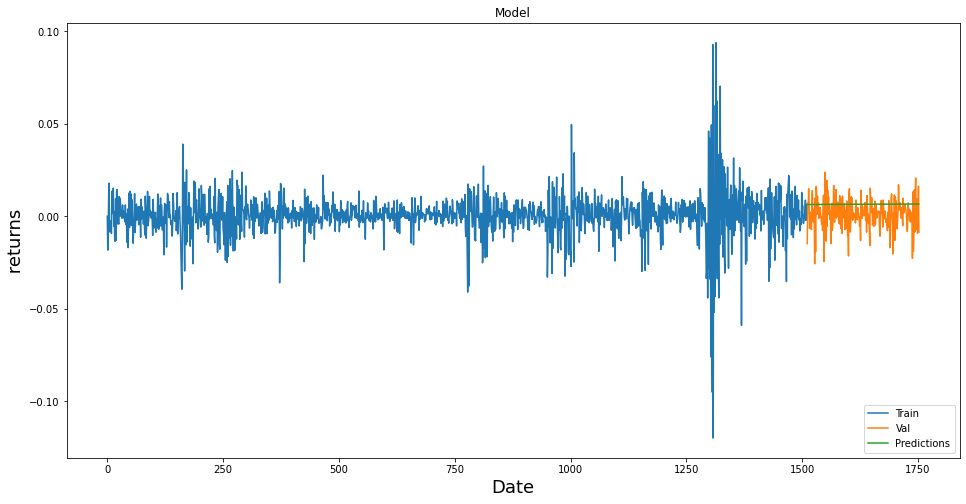

In [ ]:
# Visualising the results
import matplotlib.pyplot as plt
training_data_len = len(train)
trains = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = B_pred
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel(' returns ', fontsize=18)
plt.plot(trains['returns'])
plt.plot(valid[['returns', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()